fraction evaporated into SM =  97.08434558030845  %
g_V =  7.486648777789885e-09
g_D =  7.486648777789888e-09
Oh2 = 0.12741875299222602


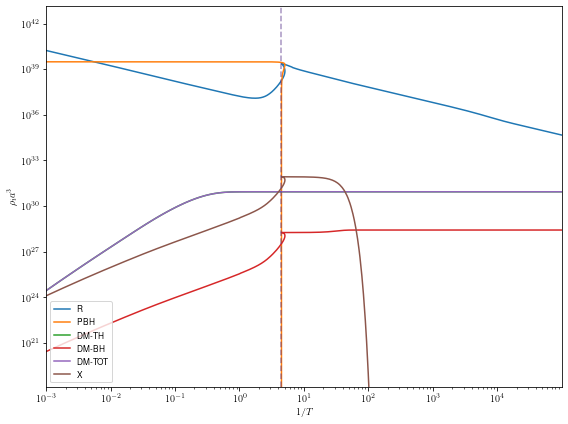

Is DM hot? --> False
relic numerics :  0.12741875299222602
relic analytics :  0.13131694881466535
Thermalization of X -> False


In [3]:
###################################################################################################
#                                                                                                 #
#                        Primordial Black Hole Evaporation + DM Production                        #
#                                    Interplay with Freeze-In                                     #
#                                                                                                 #
#         Authors: Andrew Cheek, Lucien Heurtier, Yuber F. Perez-Gonzalez, Jessica Turner         #
#                                   Based on: arXiv:2107.xxxxx                                    #
#                                                                                                 #
###################################################################################################


import BHProp as bh
import ulysses
import math
from odeintw import odeintw
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad, ode, solve_ivp, odeint
from scipy.optimize import root
from scipy.special import zeta, kn
from scipy.interpolate import interp1d, RectBivariateSpline
from numpy import ma
from matplotlib import ticker, cm
from matplotlib import cm

from collections import OrderedDict

import BHProp as bh #Schwarzschild and Kerr BHs library

from Omega_h2_onlyDM import FrInPBH as FrIn1 # Only DM contribution

#----- Package for LateX plotting -----
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath,amssymb,bm}')
#-----


# Import solving functions
from Omega_h2_FI import FrInPBH as FrInFull # Freeze-In + PBH



# ----------- Input Parameters --------------
Mi    = 7.47  # Log10@ Initial BH mass in g
ai    = 0.    # Initial a* value, a* = 0. -> Schwarzschild, a* > 0. -> Kerr.
bi    = -10.  # Log10@beta^\prime
mDM   = -3.   # Log10 @ DM Mass in GeV
mX    = 1.    # Log10 @ Mediaton Mass in GeV
mf    = -10.  # Log10 @ SM mass in GeV
sv    = -43.  # Log10 @ averaged cross section <sv>
BR    = 0.5   # Branching ratio to DM
g_DM  = 2     # DM degrees of freedom
model = 1     # Type of model --> fixed here to be one


Z=FrInFull(Mi, ai, bi, mDM, mX, mf, sv, BR, g_DM, model)

relic=Z.Omegah2()

relic_analytic=Z.Omegah2_analytics_FI()

print('relic numerics : ',relic)
print('relic analytics : ',relic_analytic[0])
if(relic_analytic[1]>=1):
    print('Thermalization of X -> True')
else:
    print('Thermalization of X -> False')